# Project ~ Olist Store (E-Commerce)
The project will be presented as follows:
* Data collection
* Data quality checks
* Exploratory Data Analysis 
* Data Modeling
* Project Documentation 

## Data collection

This project is for Olist Store which is located in Brazil and it is an e-commerce store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allow viewing orders from multiple dimensions: from order status, price, payment, and freight performance to customer location, product attributes, and finally, reviews written by customers. There is also a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymized, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.


#### importing necessary libraries

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

# for counting most common & least common words
from itertools import combinations
from collections import Counter

# for visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# for scalling
from sklearn.preprocessing import MinMaxScaler

# for models
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression

# command used for skipping browser warnings
import warnings
warnings.filterwarnings('ignore')

#### Loading the datasets

In [2]:
# dataset one: customer details

olist_customers = pd.read_csv("datasets/olist_customers_dataset.csv")
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# dataset two: location

olist_geolocation = pd.read_csv("datasets/olist_geolocation_dataset.csv")
olist_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
# dataset three

olist_order_items = pd.read_csv("datasets/olist_order_items_dataset.csv")
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# dataset four: payement details

olist_order_payments = pd.read_csv("datasets/olist_order_payments_dataset.csv")
olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# dataset five: review details

olist_order_reviews = pd.read_csv("datasets/olist_order_reviews_dataset.csv")
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# dataset six

olist_orders = pd.read_csv("datasets/olist_orders_dataset.csv")
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# dataset seven: products details

olist_products = pd.read_csv("datasets/olist_products_dataset.csv")
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
# dataset eight: seller details

olist_sellers = pd.read_csv("datasets/olist_sellers_dataset.csv")
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
# dataset nine: product name

product_category_name = pd.read_csv("datasets/product_category_name_translation.csv")
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


after loading the datasets know we will try to combine all the datasets into one dataset by using merge which is the function used when you want to combine more than one dataset together

#### Merging the datasets

In [11]:
# merging dataset three and four
merge_1 = pd.merge(olist_order_items, olist_order_payments, on='order_id')

In [12]:
# merging dataset five and six
merge_2 = pd.merge(olist_order_reviews, olist_orders, on='order_id')

In [13]:
# merging dataset seven and nine
merge_3 = pd.merge(olist_products, product_category_name, on='product_category_name')

In [14]:
# merging dataset merge_1 and eight
merge_4 = pd.merge(merge_1, olist_sellers, on='seller_id')

In [15]:
# merging dataset merge_2 and one
merge_5 = pd.merge(merge_2, olist_customers, on='customer_id')

In [16]:
# merging dataset merge_3 and merge_4
merge_6 = pd.merge(merge_3, merge_4, on='product_id')

In [17]:
# merging dataset merge_5 and merge_6
allDatasets = pd.merge(merge_5, merge_6, on='order_id')

Now we have merged all the datasets that we will be using in our project into one dataset lets display it below and see how it is

In [18]:
allDatasets.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,2018-01-18 15:47:59,185.00,13.63,1,credit_card,8,397.26,14600,sao joaquim da barra,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,2018-01-18 15:47:59,185.00,13.63,1,credit_card,8,397.26,14600,sao joaquim da barra,SP
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,2018-03-06 12:48:39,79.79,8.30,1,credit_card,1,88.09,12233,sao jose dos campos,SP
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,2018-02-08 10:31:15,149.00,45.12,1,credit_card,1,194.12,37175,ilicinea,MG
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,2017-04-13 17:55:19,179.99,42.85,1,credit_card,1,222.84,37175,ilicinea,MG


## Data quality check

Now that we have our main datset, we shall perform data cleaning and some quality checks on it to see if there are any duplicates or missing values before proceeding to the next step. 

First we will start by cheking the information of our dataset and that will guide us on what we are dealling with

In [19]:
# shape of the dataset
print(allDatasets.shape)

(116581, 40)


In [20]:
allDatasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
review_id                        116581 non-null object
order_id                         116581 non-null object
review_score                     116581 non-null int64
review_comment_title             13996 non-null object
review_comment_message           49878 non-null object
review_creation_date             116581 non-null object
review_answer_timestamp          116581 non-null object
customer_id                      116581 non-null object
order_status                     116581 non-null object
order_purchase_timestamp         116581 non-null object
order_approved_at                116567 non-null object
order_delivered_carrier_date     115368 non-null object
order_delivered_customer_date    114066 non-null object
order_estimated_delivery_date    116581 non-null object
customer_unique_id               116581 non-null object
customer_zip_code_prefix         116581 non-null int

#### Dealing with Missing values in our dataset
We will now check if we have any missing value in any column of our dataset and if we find any column containing missing value we shall weigh it, if it is important we will use "Impute the Missing" to replace the missing values with the average or median value from the data of the same feature that is not missing, if the column containing missing value is not important we will just drop it

In [21]:
allDatasets.isnull().sum()

review_id                             0
order_id                              0
review_score                          0
review_comment_title             102585
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
product_id                            0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1


so our dataset has 9 columns that have missing values and after weighing them, "product_weight_g" can be of use in our model so we will impute it with its mean value then the rest of the columns can be dropped since they have no much use in our model 

In [22]:
# We will need "product_weight_g" column so we shall display the "Mean" value of it to be used in filling null of the same column
allDatasets["product_weight_g"].mean()

2115.560422027792

In [23]:
# filling the missing value in "product_weight_g" column with "mean" value
allDatasets['product_weight_g'].fillna(allDatasets['product_weight_g'].mean(), inplace = True)

In [24]:
# Other columns with missing values have no importance in this project so we shall drop them
for col in allDatasets:
    missing = allDatasets[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        del allDatasets[col] 

In [25]:
allDatasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 32 columns):
review_id                        116581 non-null object
order_id                         116581 non-null object
review_score                     116581 non-null int64
review_creation_date             116581 non-null object
review_answer_timestamp          116581 non-null object
customer_id                      116581 non-null object
order_status                     116581 non-null object
order_purchase_timestamp         116581 non-null object
order_estimated_delivery_date    116581 non-null object
customer_unique_id               116581 non-null object
customer_zip_code_prefix         116581 non-null int64
customer_city                    116581 non-null object
customer_state                   116581 non-null object
product_id                       116581 non-null object
product_category_name            116581 non-null object
product_name_lenght              116581 non-null fl

#### Checking for Duplicates in our dataset
Duplicate data happens when all the feature values within the observations are the same. We will use Key Features based strategy to find out if our dataset contains some duplicated data based on a set of unique identifiers.

We can set up a group of critical features as unique identifiers in our dataset to check if there are duplicates based on them.
Then we create a dataset called olistData by dropping the duplicates. We compare the shapes of the two datasets (olistDataset and olistDataset) to find out the number of duplicated rows.

In [26]:
# drop duplicates based on subset of variables.
key = ['order_id','customer_unique_id','product_id','order_item_id','seller_id']

olistData = allDatasets.drop_duplicates(subset=key)

print("The original dataset ->", allDatasets.shape)
print("The new dataset ->", olistData.shape)

The original dataset -> (116581, 32)
The new dataset -> (111020, 32)


we have dropped 5,561 rows which appeared to be duplicated values based on the subset of variables that we used above and now we have created a new dataset named olistData 
#### Date and Timestamp Format
on our dataset the columns that contain date and time are in object data type and we want to convert them to be in datetime data type

In [27]:
# converting review_creation_date to datetime format
olistData['review_creation_date'] = pd.to_datetime(olistData["review_creation_date"])

# converting order_purchase_timestamp to datetime format
olistData['order_purchase_timestamp'] = pd.to_datetime(olistData['order_purchase_timestamp'])

# converting order_estimated_delivery_date to datetime format
olistData['order_estimated_delivery_date'] = pd.to_datetime(olistData['order_estimated_delivery_date'])

# converting shipping_limit_date to datetime format
olistData['shipping_limit_date'] = pd.to_datetime(olistData['shipping_limit_date'])

In [28]:
olistData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111020 entries, 0 to 116580
Data columns (total 32 columns):
review_id                        111020 non-null object
order_id                         111020 non-null object
review_score                     111020 non-null int64
review_creation_date             111020 non-null datetime64[ns]
review_answer_timestamp          111020 non-null object
customer_id                      111020 non-null object
order_status                     111020 non-null object
order_purchase_timestamp         111020 non-null datetime64[ns]
order_estimated_delivery_date    111020 non-null datetime64[ns]
customer_unique_id               111020 non-null object
customer_zip_code_prefix         111020 non-null int64
customer_city                    111020 non-null object
customer_state                   111020 non-null object
product_id                       111020 non-null object
product_category_name            111020 non-null object
product_name_lenght        

#### Unnecessary data
After we have worked on the missing data and duplicates as well as date and timestamp format, now lets check out on the unnecessary data

All the data feeding into the model should serve the purpose of the project. The unnecessary data is when the data doesn’t add value in the model and has to be removed.

In [29]:
for col in olistData.columns:
    if 'review_id' in col:
        del olistData[col]
        
    if 'review_answer_timestamp' in col:
        del olistData[col]
        
    if 'order_estimated_delivery_date' in col:
        del olistData[col]
        
    if 'customer_zip_code_prefix' in col:
        del olistData[col]
        
    if 'customer_state' in col:
        del olistData[col]    
        
    if 'product_name_lenght' in col:
        del olistData[col]        
                
    if 'product_description_lenght' in col:
        del olistData[col]       
                
    if 'product_photos_qty' in col:
        del olistData[col]  
        
    if 'order_item_id' in col:
        del olistData[col]        
                
    if 'shipping_limit_date' in col:
        del olistData[col] 
        
    if 'seller_zip_code_prefix' in col:
        del olistData[col]        
                
    if 'seller_state' in col:
        del olistData[col] 

In [30]:
olistData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111020 entries, 0 to 116580
Data columns (total 20 columns):
order_id                         111020 non-null object
review_score                     111020 non-null int64
review_creation_date             111020 non-null datetime64[ns]
customer_id                      111020 non-null object
order_status                     111020 non-null object
order_purchase_timestamp         111020 non-null datetime64[ns]
customer_unique_id               111020 non-null object
customer_city                    111020 non-null object
product_id                       111020 non-null object
product_category_name            111020 non-null object
product_weight_g                 111020 non-null float64
product_category_name_english    111020 non-null object
seller_id                        111020 non-null object
price                            111020 non-null float64
freight_value                    111020 non-null float64
payment_sequential             

## Exploratory Data Analysis 
##### Important relationships between the variables in the dataset. 
A freight value is a price charged when a certain cargo is delivered from source location to destination location.

In [31]:
# relationship of freight value and customer_city (pick up location)
freight = olistData[olistData['freight_value'].duplicated(keep=False)]

freight['grouped'] = freight.groupby('freight_value')['customer_city'].transform(lambda x: ','.join(x))
freight2 = freight[['freight_value', 'grouped']].drop_duplicates()

In [32]:
count = Counter()

for row in freight2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 1)))

for key,value in count.most_common():
    print(key, value)

('sao paulo',) 17352
('rio de janeiro',) 7578
('belo horizonte',) 3050
('brasilia',) 2314
('curitiba',) 1709
('campinas',) 1619
('porto alegre',) 1565
('salvador',) 1347
('guarulhos',) 1307
('sao bernardo do campo',) 1035
('niteroi',) 953
('santo andre',) 876
('osasco',) 838
('santos',) 801
('goiania',) 774
('sao jose dos campos',) 751
('sorocaba',) 693
('fortaleza',) 690
('florianopolis',) 638
('jundiai',) 632
('recife',) 632
('ribeirao preto',) 571
('nova iguacu',) 486
('contagem',) 471
('barueri',) 465
('juiz de fora',) 452
('belem',) 450
('mogi das cruzes',) 433
('sao goncalo',) 432
('vitoria',) 409
('piracicaba',) 407
('uberlandia',) 398
('sao jose do rio preto',) 374
('sao luis',) 370
('carapicuiba',) 365
('vila velha',) 360
('campo grande',) 349
('praia grande',) 348
('maua',) 339
('indaiatuba',) 326
('taboao da serra',) 324
('londrina',) 322
('diadema',) 320
('serra',) 310
('maringa',) 304
('sao caetano do sul',) 300
('taubate',) 298
('bauru',) 291
('duque de caxias',) 290
('jo

('itaocara',) 18
('barra velha',) 18
('barao de cocais',) 18
('guacui',) 18
('charqueadas',) 18
('jaguariaiva',) 18
('floriano',) 18
('tucurui',) 18
('vilhena',) 18
('jacarezinho',) 17
('marataizes',) 17
('agudos',) 17
('pitangueiras',) 17
('macatuba',) 17
('paraguacu',) 17
('serra negra',) 17
('itapetinga',) 17
('teutonia',) 17
('sao borja',) 17
('buritis',) 17
('uruacu',) 17
('nova prata',) 17
('ipora',) 17
('capanema',) 17
('santa ines',) 17
('alegre',) 17
('vitoria de santo antao',) 17
('santana',) 17
('piraquara',) 17
('ipojuca',) 17
('itabaiana',) 17
('pires do rio',) 17
('cunha',) 16
('cajati',) 16
('candido mota',) 16
('santa adelia',) 16
('taquarituba',) 16
('sao francisco de itabapoana',) 16
('paranaiba',) 16
('anchieta',) 16
('raposos',) 16
('caxambu',) 16
('ibirama',) 16
('bom jardim',) 16
('posse',) 16
('natividade',) 16
('carmo do rio claro',) 16
('santa vitoria',) 16
('santo antonio da patrulha',) 16
('manhumirim',) 16
('palmeira das missoes',) 16
('forquilhinha',) 16
('

('lauro muller',) 8
('balneario pinhal',) 8
('carai',) 8
('anicuns',) 8
('california da barra',) 8
('comendador levy gasparian',) 8
('ibatiba',) 8
('marilandia',) 8
('amambai',) 8
('bicas',) 8
('dores de campos',) 8
('japuiba',) 8
('pirapetinga',) 8
('campo ere',) 8
('nova europa',) 8
('ubajara',) 8
('espumoso',) 8
('pontal do parana',) 8
('encruzilhada do sul',) 8
('sao sepe',) 8
('arceburgo',) 8
('mambore',) 8
('tocantinopolis',) 8
('getulio vargas',) 8
('porecatu',) 8
('itambacuri',) 8
('alcinopolis',) 8
('japura',) 8
('cristalina',) 8
('tupi paulista',) 8
('cananeia',) 8
('rodeio',) 8
('cajobi',) 8
('aracuai',) 8
('cruzeiro do oeste',) 8
('sao jose da lapa',) 8
('cassilandia',) 8
('coribe',) 8
('ruy barbosa',) 8
('potiragua',) 8
('porto real',) 8
('apiai',) 8
('caico',) 8
('sapezal',) 8
('aguas belas',) 8
('sao felix do xingu',) 8
('penedo',) 8
('sao goncalo do rio abaixo',) 8
('realeza',) 8
('cambuci',) 8
('ortigueira',) 8
('itabera',) 8
('bayeux',) 8
('bela vista de goias',) 8
('

('sertao',) 5
('capivari de baixo',) 5
('maristela',) 5
('massaranduba',) 5
('rio pardo',) 5
('toritama',) 5
('sao domingos do prata',) 5
('chui',) 5
('catende',) 5
('jordania',) 5
('barreiros',) 5
('catuipe',) 5
('pacatuba',) 5
('macaiba',) 5
('cidreira',) 5
('figueira',) 5
('santo antonio das missoes',) 5
('barra do ribeiro',) 5
('cacequi',) 5
('altos',) 5
('brauna',) 5
('aracoiaba',) 5
('roseira',) 5
('maracana',) 5
('itaju',) 5
('frei inocencio',) 5
('arcoverde',) 5
('upanema',) 5
('dores do rio preto',) 5
('santa maria de itabira',) 5
('guarai',) 5
('itarantim',) 5
('santa cruz',) 5
('buriticupu',) 5
('quixeramobim',) 5
('urbano santos',) 5
('cabrobo',) 5
('sao miguel do araguaia',) 5
('nova fatima',) 5
('guadalupe',) 5
('itapaje',) 5
('jatoba',) 5
('sao bento',) 5
('matias olimpio',) 5
('ilhota',) 4
('santa barbara d oeste',) 4
('itatinga',) 4
('clementina',) 4
('florida paulista',) 4
('cruzalia',) 4
('sao sebastiao da grama',) 4
('macedonia',) 4
('cabralia paulista',) 4
('igarac

('campos borges',) 3
('ventania',) 3
('barra do mendes',) 3
('rio de contas',) 3
('iacu',) 3
('vera',) 3
('piata',) 3
('teofilandia',) 3
('itamari',) 3
('correntina',) 3
('ilha comprida',) 3
('barro alto',) 3
('xique-xique',) 3
('serrolandia',) 3
('lobato',) 3
('sao bento do una',) 3
('sao jose do turvo',) 3
('carvalhopolis',) 3
('sapeacu',) 3
('patu',) 3
('barras',) 3
('guajara-mirim',) 3
("olho d'agua das flores",) 3
("machadinho d'oeste",) 3
('grajau',) 3
('mari',) 3
('urupa',) 3
('luzilandia',) 3
('presidente medici',) 3
('paulistana',) 3
('cuite',) 3
('aragarcas',) 3
('chapadinha',) 3
('tomazina',) 3
('itaja',) 3
('jundiai do sul',) 3
('carneirinho',) 3
('itapetim',) 3
('paranaiguara',) 3
('campo novo',) 3
('belo vale',) 3
('sao jose do egito',) 3
('acu',) 3
('itapissuma',) 3
('santa rita de minas',) 3
('mineiros do tiete',) 3
('monte carlo',) 3
('amapora',) 3
('cristalia',) 3
('caiana',) 3
('rio fortuna',) 3
('cocal do sul',) 3
('monsenhor tabosa',) 3
('beberibe',) 3
('santana do

('agua santa',) 2
('mata roma',) 2
('tracunhaem',) 2
('conceicao',) 2
('passagem franca',) 2
('santa maria do para',) 2
('macaparana',) 2
('toropi',) 2
('sarapui',) 2
("perola d'oeste",) 2
('sao sebastiao do maranhao',) 2
('coroaci',) 2
('carlinda',) 2
('nova canaa paulista',) 2
('novo itacolomi',) 2
('novo barreiro',) 2
('porto firme',) 2
('putinga',) 2
('augusto pestana',) 2
('itatiaiucu',) 2
('deodapolis',) 2
('medeiros',) 2
('planura',) 2
('queluz',) 2
('sao bras do suacui',) 2
('jaraguari',) 2
('corrego danta',) 2
('campestre da serra',) 2
('irai',) 2
('santa terezinha',) 2
('nova cantu',) 2
('campo florido',) 2
('sao francisco de assis',) 2
('jaguaquara',) 2
('lunardelli',) 2
('imbe de minas',) 2
('cerro negro',) 2
('magda',) 2
('canitar',) 2
('moncoes',) 2
('bom jesus da penha',) 2
('cabo verde',) 2
('santa cruz do prata',) 2
('aracitaba',) 2
('juranda',) 2
('anitapolis',) 2
('matutina',) 2
('irai de minas',) 2
('nova palma',) 2
('tunas do parana',) 2
('salto da divisa',) 2
('fa

('cupira',) 1
('pium',) 1
('missao velha',) 1
('lagoa do mato',) 1
('lavras da mangabeira',) 1
('vertentes',) 1
('senador jose porfirio',) 1
('sao jorge do oeste',) 1
('juruti',) 1
('tome-acu',) 1
('porteiras',) 1
('varzedo',) 1
('combinado',) 1
('tracuateua',) 1
('dom cavati',) 1
('buique',) 1
('sardoa',) 1
('dezesseis de novembro',) 1
('rio dos indios',) 1
('vitorinos',) 1
('braunas',) 1
('jaupaci',) 1
('pedras altas',) 1
('estrela do sul',) 1
('britania',) 1
('ilicinea',) 1
('pirapo',) 1
('arroio trinta',) 1
('pacotuba',) 1
("lagoa d'anta",) 1
('ibitiuva',) 1
('monsenhor paulo',) 1
('nova america',) 1
('areia branca dos assis',) 1
('aramina',) 1
('ponte alta do norte',) 1
('traipu',) 1
('brejolandia',) 1
('rio grande do piaui',) 1
('apora',) 1
('jacuipe',) 1
('ibiajara',) 1
('indiaroba',) 1
('cacimbinhas',) 1
('francisco santos',) 1
('carnaubal',) 1
('sao joao do sobrado',) 1
('demerval lobao',) 1
('jardim abc de goias',) 1
('monte alverne',) 1
('pequi',) 1
('mocajuba',) 1
('milha',

('central',) 1
('tabuleiro do norte',) 1
('buriti do tocantins',) 1
('pontao',) 1
('novo mundo',) 1
('sao jose do divino',) 1
('palmopolis',) 1
('santa cruz do timbo',) 1
('guassusse',) 1
('remigio',) 1
('santo inacio',) 1
('pereiras',) 1
('marechal deodoro',) 1
('paripueira',) 1
('iaras',) 1
('frei gaspar',) 1
('vargem grande',) 1
('armazem',) 1
('aquidaba',) 1
('angelina',) 1
('sao clemente',) 1
('salvador do sul',) 1
('salto do itarare',) 1
('aracatu',) 1
('sao felix de minas',) 1
('onda verde',) 1
('ilha grande',) 1
('boa vista do cadeado',) 1
('riacho da cruz',) 1
('pirajuba',) 1
('pedro velho',) 1
('anhumas',) 1
('charrua',) 1
('felisburgo',) 1
('angelica',) 1
('madalena',) 1
('lebon regis',) 1
('picarras',) 1
('sao pedro do iguacu',) 1
('sao geraldo do baguari',) 1
('sete de setembro',) 1
('nova padua',) 1
('glaura',) 1
('pirambu',) 1
('grupiara',) 1
('aguas claras',) 1
('livramento',) 1
('retirolandia',) 1
('agua preta',) 1
('arapoema',) 1
('cajari',) 1
('fortim',) 1
('luis cor

In [33]:
olistData["freight_value"]

0          13.63
1          13.63
2           8.30
3          45.12
4          42.85
5         134.25
6          13.20
7          13.20
8          13.20
9           4.40
10         11.85
11         59.06
12         12.13
13         26.69
14         17.00
15         14.60
16         14.60
17         14.60
18         14.60
19         14.60
20          7.78
21         22.06
22          7.31
23         14.61
24         13.07
25         21.66
26          8.29
27         16.83
28          9.38
29         21.54
           ...  
116548     11.62
116549     11.62
116550     11.62
116551     11.62
116552     11.62
116553     16.09
116554      7.87
116555     25.74
116556     20.02
116557     15.10
116558     23.00
116559     21.19
116560     16.18
116561     40.34
116562      8.71
116563     11.24
116567     42.59
116568     16.15
116569     18.93
116570      0.00
116571     12.79
116572     15.41
116573     15.10
116574     16.43
116575     61.20
116576      9.77
116577     15.59
116578     15.

In [34]:
olistData["customer_city"]

0                         osasco
1                         osasco
2                    nova odessa
3         santo antonio de jesus
4                       gravatal
5                    curitibanos
6                      sao paulo
7                      sao paulo
8                      sao paulo
9                      sao paulo
10                     sao paulo
11                       resende
12                       jacarei
13                     sao paulo
14                       timoteo
15                belo horizonte
16                belo horizonte
17                belo horizonte
18                belo horizonte
19                belo horizonte
20                         cotia
21                        jequie
22                       diadema
23                       diadema
24                     guarulhos
25               paty do alferes
26                     sao paulo
27                 montes claros
28                     guarulhos
29                     congonhas
          

The above code simply tells us that when a customer orders a certain product and deliveries are made based on his/her city location he/she will be required to pay a freight value of a certain amount of money based on the city that the product has been delivered to which is represented here as customer city
##### Product that are mostly sold and least sold in olist store

In [35]:
# grouping the products by order id 
df = olistData[olistData['order_id'].duplicated(keep=False)]

df['grouped'] = df.groupby('order_id')['product_category_name_english'].transform(lambda x: ','.join(x))
df2 = df[['order_id', 'grouped']].drop_duplicates()

In [36]:
# Top-ten most selling products.
count = Counter()

for row in df2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 1)))

for key,value in count.most_common(10):
    print(key, value)

('furniture_decor',) 3270
('bed_bath_table',) 3148
('computers_accessories',) 1933
('housewares',) 1837
('sports_leisure',) 1692
('health_beauty',) 1513
('garden_tools',) 1430
('watches_gifts',) 671
('office_furniture',) 659
('telephony',) 636


In [37]:
# Top-ten least selling products.
count = Counter()

for row in df2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 1)))

for key,value in count.most_common()[:-11:-1]:
    print(key, value)

('fashion_childrens_clothes',) 2
('music',) 2
('small_appliances_home_oven_and_coffee',) 2
('cds_dvds_musicals',) 4
('arts_and_craftmanship',) 4
('la_cuisine',) 4
('fashion_sport',) 6
('home_appliances_2',) 9
('party_supplies',) 9
('flowers',) 10


##### Product review score

In [38]:
olistData["review_score"].value_counts()

5    62425
4    20962
1    14373
3     9377
2     3883
Name: review_score, dtype: int64

In [39]:
# Ten products with high review scores on average.
olistData.loc[olistData["review_score"]>=5, "product_category_name_english"].head(10)

2     computers_accessories
3     computers_accessories
4              garden_tools
5            sports_leisure
10           bed_bath_table
11                     toys
12             home_confort
14                     toys
15             garden_tools
16             garden_tools
Name: product_category_name_english, dtype: object

In [40]:
# Ten products with low review scores on average.
olistData.loc[olistData["review_score"]<=1, "product_category_name_english"].head(10)

6          bed_bath_table
7          bed_bath_table
8          bed_bath_table
9          bed_bath_table
28    luggage_accessories
40         bed_bath_table
47          watches_gifts
56         bed_bath_table
57         bed_bath_table
58         bed_bath_table
Name: product_category_name_english, dtype: object

#####  Modes of payement

In [41]:
#  Modes of payement
olistData["payment_type"].value_counts()

credit_card    83977
boleto         22542
voucher         2845
debit_card      1656
Name: payment_type, dtype: int64

Now we have seen that there are four types of payement that happens in olist store, which are: credit_card, boleto, voucher and  debit_card. And from the above analysis it's clear that the most preffered mode of payement by customers is credit card while the least preffered mode of payement by customers is debit card.
##### Any other analysis that is significantly insightful.

* adding "review_month" and "order_purchase_month" in our dataset 
* Adding "order_purchase_hour" in our dataset

In [42]:
olistData["review_month"] = olistData["review_creation_date"].dt.month
olistData["order_purchase_month"] = olistData["order_purchase_timestamp"].dt.month
olistData["order_purchase_hour"] = pd.to_datetime(olistData["order_purchase_timestamp"]).dt.hour

The month which the store gets more review scores from the customers 

In [43]:
# August is when the store get more review scores from the customers 
olistData.groupby("review_month")["review_score"].sum()

review_month
1     28095
2     33092
3     42776
4     40651
5     51719
6     47171
7     42594
8     62789
9     19288
10    21220
11    22176
12    34672
Name: review_score, dtype: int64

The month which the customers purchase more products from the store

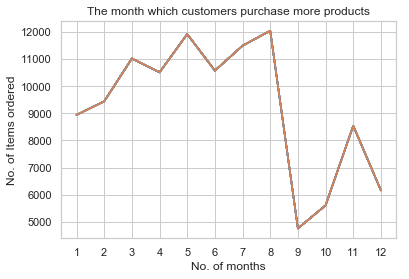

In [44]:
# More product are being purchased in the month of May and August
keys = [pair for pair, df in olistData.groupby(['order_purchase_month'])]

plt.plot(keys, olistData.groupby(['order_purchase_month']).count())
plt.title('The month which customers purchase more products')
plt.ylabel('No. of Items ordered')
plt.xlabel('No. of months')
plt.xticks(keys)
plt.show()

When is the best time that customers purchase products from the store

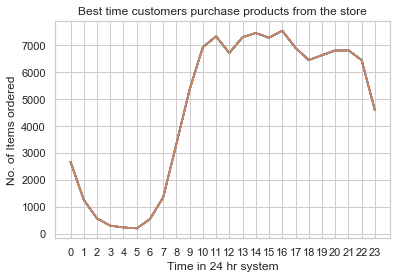

In [45]:
# Most product are being ordered from 11am to 16pm(4pm)
keys = [pair for pair, df in olistData.groupby(['order_purchase_hour'])]

plt.plot(keys, olistData.groupby(['order_purchase_hour']).count())
plt.title('Best time customers purchase products from the store')
plt.ylabel('No. of Items ordered')
plt.xlabel('Time in 24 hr system')
plt.xticks(keys)
plt.show()

Cities that sell most products to the customers

In [46]:
# cities that sell more products
cities = olistData[olistData['order_id'].duplicated(keep=False)]

cities['grouped'] = cities.groupby('order_id')['seller_city'].transform(lambda x: ','.join(x))
cities2 = cities[['order_id', 'grouped']].drop_duplicates()

In [47]:
count = Counter()

for row in cities2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 1)))

for key,value in count.most_common(10):
    print(key, value)

('sao paulo',) 5980
('ibitinga',) 2191
('sao jose do rio preto',) 1044
('maringa',) 670
('itaquaquecetuba',) 641
('curitiba',) 556
('piracicaba',) 525
('guarulhos',) 503
('rio de janeiro',) 457
('santo andre',) 450


##### Produce informing visualizations, descriptive and inferential statistics for your analysis. 

In [48]:
# statistical measures about the dataset
olistData.describe()

,review_score,product_weight_g,price,freight_value,payment_sequential,payment_installments,payment_value,review_month,order_purchase_month,order_purchase_hour
count,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000
mean,4.019483,2099.927369,120.757152,20.026013,1.022383,3.009161,177.854427,6.182562,6.031634,14.753981
std,1.396946,3755.002193,183.374801,15.841434,0.253376,2.802349,271.374448,3.177738,3.226008,5.312558
min,1.000000,0.000000,0.850000,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,4.000000,300.000000,39.900000,13.080000,1.000000,1.000000,64.100000,4.000000,3.000000,11.000000
50%,5.000000,700.000000,74.990000,16.310000,1.000000,2.000000,112.430000,6.000000,6.000000,15.000000
75%,5.000000,1800.000000,134.900000,21.180000,1.000000,4.000000,193.980000,8.000000,8.000000,19.000000
max,5.000000,40425.000000,6735.000000,409.680000,27.000000,24.000000,13664.080000,12.000000,12.000000,23.000000


##### Plotting Numerical features

In [49]:
sns.set()

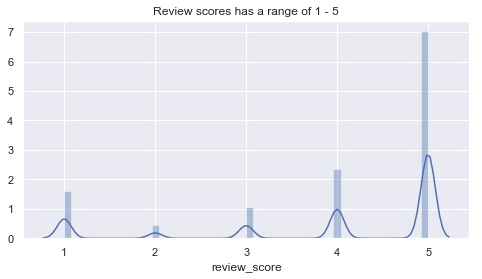

In [50]:
# review_score Distribution
plt.figure(figsize=(8,4))
sns.distplot(olistData["review_score"])
plt.title('Review scores has a range of 1 - 5')
plt.show()

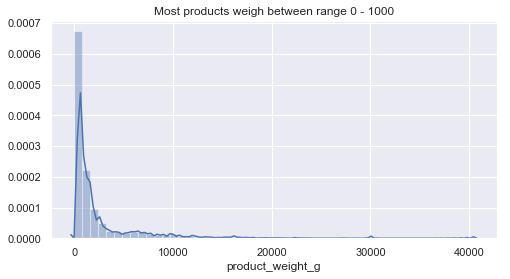

In [51]:
# product_weight_g Distribution
plt.figure(figsize=(8,4))
sns.distplot(olistData["product_weight_g"])
plt.title('Most products weigh between range 0 - 1000')
plt.show()

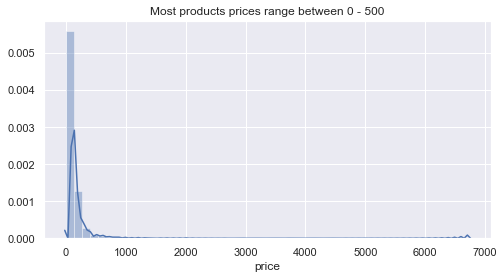

In [52]:
# price Distribution
plt.figure(figsize=(8,4))
sns.distplot(olistData["price"])
plt.title('Most products prices range between 0 - 500')
plt.show()

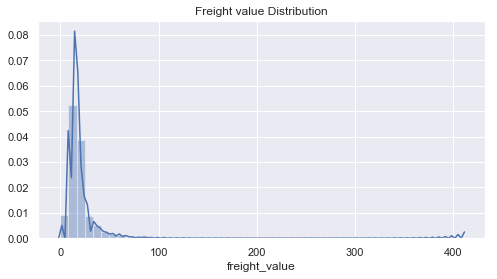

In [53]:
# freight_value Distribution
plt.figure(figsize=(8,4))
sns.distplot(olistData["freight_value"])
plt.title('Freight value Distribution')
plt.show()

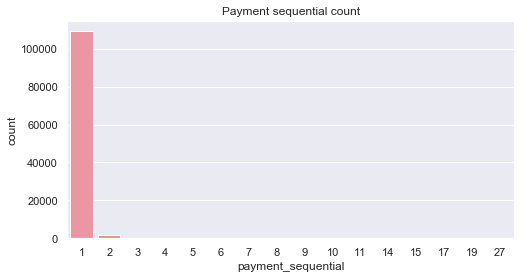

In [54]:
# payment_sequential count
plt.figure(figsize=(8,4))
sns.countplot(olistData["payment_sequential"])
plt.title('Payment sequential count')
plt.show()

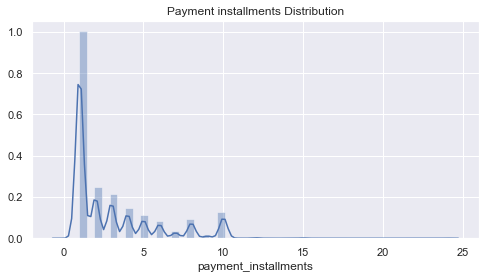

In [55]:
# payment_installments Distribution
plt.figure(figsize=(8,4))
sns.distplot(olistData["payment_installments"])
plt.title('Payment installments Distribution')
plt.show()

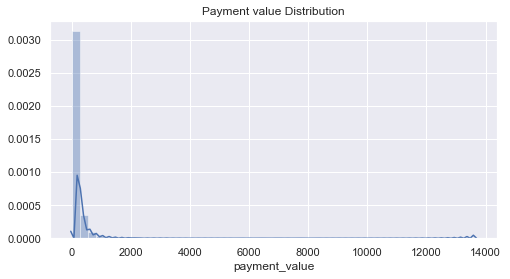

In [56]:
# payment_value Distribution
plt.figure(figsize=(8,4))
sns.distplot(olistData["payment_value"])
plt.title('Payment value Distribution')
plt.show()

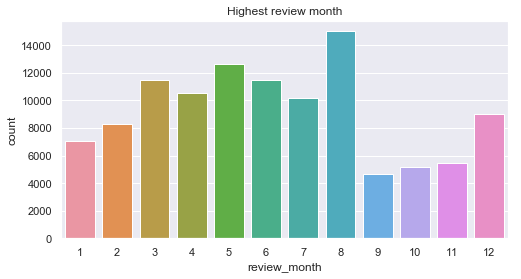

In [57]:
# review_month counting
plt.figure(figsize=(8,4))
sns.countplot(olistData["review_month"])
plt.title('Highest review month')
plt.show()

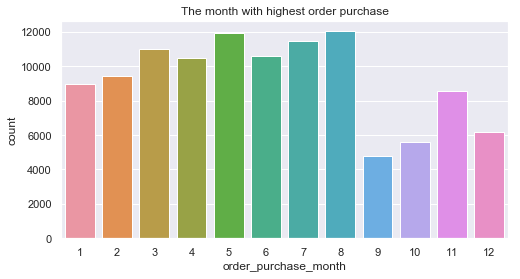

In [58]:
# order_purchase_month counting
plt.figure(figsize=(8,4))
sns.countplot(olistData["order_purchase_month"])
plt.title('The month with highest order purchase')
plt.show()

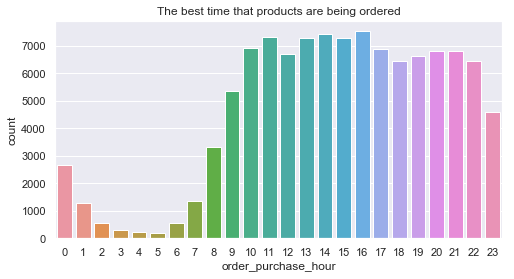

In [59]:
# order_purchase_hour counting
plt.figure(figsize=(8,4))
sns.countplot(olistData["order_purchase_hour"])
plt.title('The best time that products are being ordered')
plt.show()

##### Plotting Categorical features

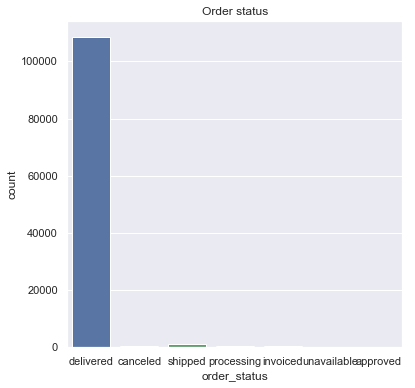

In [60]:
# order_status Column
plt.figure(figsize=(6,6))
sns.countplot(x="order_status", data=olistData)
plt.title('Order status')
plt.show()

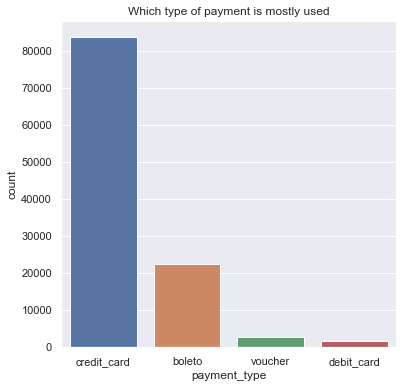

In [61]:
# payment_type Column
plt.figure(figsize=(6,6))
sns.countplot(x="payment_type", data=olistData)
plt.title('Which type of payment is mostly used')
plt.show()

##### Using numeric columns to show correlation

In [62]:
olistData.corr()

,review_score,product_weight_g,price,freight_value,payment_sequential,payment_installments,payment_value,review_month,order_purchase_month,order_purchase_hour
review_score,1.000000,-0.031276,-0.005307,-0.037188,-0.000011,-0.045544,-0.086346,0.028751,0.031010,0.009075
product_weight_g,-0.031276,1.000000,0.339756,0.611334,0.011027,0.185247,0.313251,-0.009234,-0.010555,0.008842
price,-0.005307,0.339756,1.000000,0.414386,0.005132,0.282866,0.747409,0.003929,0.001628,0.007324
freight_value,-0.037188,0.611334,0.414386,1.000000,0.009517,0.190076,0.379711,0.009364,0.004125,0.005977
payment_sequential,-0.000011,0.011027,0.005132,0.009517,1.000000,-0.055104,-0.035032,0.003617,0.003079,0.004198
payment_installments,-0.045544,0.185247,0.282866,0.190076,-0.055104,1.000000,0.264897,0.030426,0.030699,0.016142
payment_value,-0.086346,0.313251,0.747409,0.379711,-0.035032,0.264897,1.000000,0.013896,0.004788,-0.003866
review_month,0.028751,-0.009234,0.003929,0.009364,0.003617,0.030426,0.013896,1.000000,0.851481,-0.002610
order_purchase_month,0.031010,-0.010555,0.001628,0.004125,0.003079,0.030699,0.004788,0.851481,1.000000,-0.004135
order_purchase_hour,0.009075,0.008842,0.007324,0.005977,0.004198,0.016142,-0.003866,-0.002610,-0.004135,1.000000


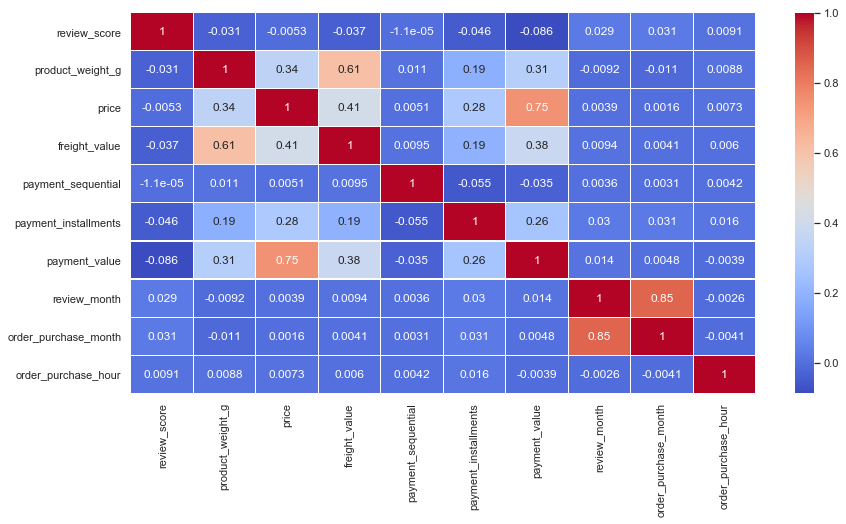

In [63]:
corr = olistData.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=.1)

In [64]:
# showing columns that strongly correlates with "price" column
olistData_numeric_col = olistData.select_dtypes(include=[np.number])
olistData_numeric_col.corr()["price"]

review_score           -0.005307
product_weight_g        0.339756
price                   1.000000
freight_value           0.414386
payment_sequential      0.005132
payment_installments    0.282866
payment_value           0.747409
review_month            0.003929
order_purchase_month    0.001628
order_purchase_hour     0.007324
Name: price, dtype: float64

There are 4 columns that strongly correlates with price and they are: payment_value, freight_value, product_weight_g and payment_installments 

## Modeling
##### Data preprocessing for categorical variables

In [65]:
olistData.head()

,order_id,review_score,review_creation_date,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,product_id,product_category_name,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_city,review_month,order_purchase_month,order_purchase_hour
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,68a5590b9926689be4e10f4ae2db21a8,osasco,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,...,185.00,13.63,1,credit_card,8,397.26,sao joaquim da barra,1,1,15
1,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,68a5590b9926689be4e10f4ae2db21a8,osasco,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,...,185.00,13.63,1,credit_card,8,397.26,sao joaquim da barra,1,1,15
2,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,64190b91b656ab8f37eb89b93dc84584,nova odessa,be0dbdc3d67d55727a65d4cd696ca73c,informatica_acessorios,...,79.79,8.30,1,credit_card,1,88.09,sao jose dos campos,3,2,12
3,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,1d47144362c14e94ccdd213e8ec277d5,santo antonio de jesus,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,...,149.00,45.12,1,credit_card,1,194.12,ilicinea,2,2,9
4,658677c97b385a9be170737859d3511b,5,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,c8cf6cb6b838dc7a33ed199b825e8616,gravatal,52c80cedd4e90108bf4fa6a206ef6b03,ferramentas_jardim,...,179.99,42.85,1,credit_card,1,222.84,ilicinea,4,4,17


##### Label encoding
deals with categorical columns. It changes values of the columns from text to strings

In [66]:
# displaying categorical columns
olistData_categorical = olistData.select_dtypes(exclude=[np.number])
olistData_categorical.columns

Index(['order_id', 'review_creation_date', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'customer_unique_id', 'customer_city',
       'product_id', 'product_category_name', 'product_category_name_english',
       'seller_id', 'payment_type', 'seller_city'],
      dtype='object')

In [67]:
encoder = LabelEncoder()

In [68]:
olistData['order_id']                      = encoder.fit_transform(olistData['order_id'])
olistData['review_creation_date']          = encoder.fit_transform(olistData['review_creation_date'])
olistData['customer_id']                   = encoder.fit_transform(olistData['customer_id'])
olistData['order_status']                  = encoder.fit_transform(olistData['order_status'])
olistData['order_purchase_timestamp']      = encoder.fit_transform(olistData['order_purchase_timestamp'])
olistData['customer_unique_id']            = encoder.fit_transform(olistData['customer_unique_id'])
olistData['customer_city']                 = encoder.fit_transform(olistData['customer_city'])
olistData['product_id']                    = encoder.fit_transform(olistData['product_id'])
olistData['product_category_name']         = encoder.fit_transform(olistData['product_category_name'])
olistData['product_category_name_english'] = encoder.fit_transform(olistData['product_category_name_english'])
olistData['seller_id']                     = encoder.fit_transform(olistData['seller_id'])
olistData['payment_type']                  = encoder.fit_transform(olistData['payment_type'])
olistData['seller_city']                   = encoder.fit_transform(olistData['seller_city'])

In [69]:
olistData.head()

,order_id,review_score,review_creation_date,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,product_id,product_category_name,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_city,review_month,order_purchase_month,order_purchase_hour
0,44048,4,408,25030,2,46113,38584,2579,31962,32,...,185.00,13.63,1,1,8,397.26,497,1,1,15
1,44048,4,408,25030,2,46113,38584,2579,31962,32,...,185.00,13.63,1,1,8,397.26,497,1,1,15
2,62503,5,458,52430,2,57185,36906,2504,23957,44,...,79.79,8.30,1,1,1,88.09,502,3,2,12
3,94916,5,437,86060,2,51324,10872,3365,26533,44,...,149.00,45.12,1,1,1,194.12,230,2,2,9
4,38520,5,142,84668,2,5990,73932,1469,10546,40,...,179.99,42.85,1,1,1,222.84,230,4,4,17


##### splitting target and features 

In [70]:
olistData.describe()

,order_id,review_score,review_creation_date,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,product_id,product_category_name,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_city,review_month,order_purchase_month,order_purchase_hour
count,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,...,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000,111020.000000
mean,48597.381841,4.019483,405.165060,48592.577094,2.036075,48377.432291,47090.113169,2367.719321,16126.953981,36.395109,...,120.757152,20.026013,1.022383,0.863124,3.009161,177.854427,355.664025,6.182562,6.031634,14.753981
std,28061.733993,1.396946,149.649755,28097.281481,0.337564,27854.606863,27149.548347,1203.029677,9281.790945,21.564121,...,183.374801,15.841434,0.253376,0.549302,2.802349,271.374448,163.711317,3.177738,3.226008,5.312558
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.850000,0.000000,1.000000,0.000000,0.000000,0.010000,0.000000,1.000000,1.000000,0.000000
25%,24269.750000,4.000000,297.000000,24314.750000,2.000000,24351.750000,23573.000000,1271.000000,8179.750000,13.000000,...,39.900000,13.080000,1.000000,1.000000,1.000000,64.100000,225.000000,4.000000,3.000000,11.000000
50%,48579.000000,5.000000,424.000000,48557.500000,2.000000,48432.500000,47160.500000,2715.000000,15947.000000,32.000000,...,74.990000,16.310000,1.000000,1.000000,2.000000,112.430000,416.000000,6.000000,6.000000,15.000000
75%,72871.250000,5.000000,525.000000,72941.250000,2.000000,72491.250000,70647.000000,3546.000000,24186.250000,55.000000,...,134.900000,21.180000,1.000000,1.000000,4.000000,193.980000,511.000000,8.000000,8.000000,19.000000
max,97254.000000,5.000000,632.000000,97254.000000,6.000000,96719.000000,94086.000000,4094.000000,32327.000000,70.000000,...,6735.000000,409.680000,27.000000,3.000000,24.000000,13664.080000,603.000000,12.000000,12.000000,23.000000


In [71]:
# features (removing column "price" from our features)
X = olistData.drop(columns='price', axis=1)

# target
Y = olistData['price']

##### Splitting the data into Train Data & Test Data

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [73]:
print("Shape of Original features: ", X.shape) 
print("Shape of Training features: ", X_train.shape)
print("Shape of Testing features: ", X_test.shape)

Shape of Original features:  (111020, 22)
Shape of Training features:  (77714, 22)
Shape of Testing features:  (33306, 22)


###### Feature scaling

In [74]:
# using MinMaxScaler to scale our features
scaler = MinMaxScaler()

# fitting the scaler with the train set so that it learn the parameters
scaler.fit(X_train)

# transforming train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# the scaler stores the max of the features learned from the X_train in max_
scaler.data_max_

array([9.725300e+04, 5.000000e+00, 6.320000e+02, 9.725400e+04,
       6.000000e+00, 9.671900e+04, 9.408600e+04, 4.093000e+03,
       3.232700e+04, 7.000000e+01, 4.042500e+04, 7.000000e+01,
       3.032000e+03, 4.096800e+02, 2.700000e+01, 3.000000e+00,
       2.400000e+01, 1.366408e+04, 6.030000e+02, 1.200000e+01,
       1.200000e+01, 2.300000e+01])

In [76]:
# the scaler stores the min of the features learned from the X_train in min_
scaler.data_min_

array([0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.01, 0.  , 1.  , 1.  , 0.  ])

In [77]:
# the scaler stores the standard deviation of the features learned from the X_train in scale_
scaler.scale_

array([1.02824592e-05, 2.50000000e-01, 1.58227848e-03, 1.02824592e-05,
       1.66666667e-01, 1.03392301e-05, 1.06285739e-05, 2.44319570e-04,
       3.09338943e-05, 1.42857143e-02, 2.47371676e-05, 1.42857143e-02,
       3.29815303e-04, 2.44092951e-03, 3.84615385e-02, 3.33333333e-01,
       4.16666667e-02, 7.31846368e-05, 1.65837479e-03, 9.09090909e-02,
       9.09090909e-02, 4.34782609e-02])

In [78]:
# X_train in form of numpy array
X_train_scaled

array([[0.81690025, 0.75      , 0.35126582, ..., 0.54545455, 0.54545455,
        0.95652174],
       [0.77389901, 0.25      , 0.65506329, ..., 0.        , 0.        ,
        0.43478261],
       [0.96643805, 0.75      , 0.99841772, ..., 0.63636364, 0.63636364,
        0.39130435],
       ...,
       [0.98395936, 1.        , 0.81803797, ..., 0.36363636, 0.27272727,
        0.86956522],
       [0.95990869, 1.        , 0.13607595, ..., 0.09090909, 0.09090909,
        0.56521739],
       [0.64958407, 0.75      , 0.51424051, ..., 0.81818182, 0.81818182,
        0.95652174]])

In [79]:
# transforming X_train_scaled and X_test_scaled from numpy array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [80]:
# rounded up to 2dp
# np.round(X_train_scaled.describe(),2)
X_train_scaled.head()

,order_id,review_score,review_creation_date,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,product_id,product_category_name,...,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_city,review_month,order_purchase_month,order_purchase_hour
0,0.816900,0.75,0.351266,0.809620,0.333333,0.154106,0.217779,0.348400,0.977016,0.457143,...,0.102573,0.039494,0.0,0.333333,0.125000,0.011148,0.847430,0.545455,0.545455,0.956522
1,0.773899,0.25,0.655063,0.321512,0.333333,0.488570,0.772687,0.285365,0.514740,0.771429,...,0.802441,0.030975,0.0,0.333333,0.166667,0.004287,0.373134,0.000000,0.000000,0.434783
2,0.966438,0.75,0.998418,0.678529,0.333333,0.996464,0.771549,0.597850,0.562347,1.000000,...,0.801781,0.066174,0.0,0.333333,0.041667,0.010472,0.830846,0.636364,0.636364,0.391304
3,0.328442,0.75,0.341772,0.753108,0.333333,0.145256,0.707852,0.135842,0.277230,0.985714,...,0.710752,0.034417,0.0,0.000000,0.041667,0.002494,0.847430,0.545455,0.454545,0.391304
4,0.579931,0.50,0.406646,0.371073,0.333333,0.177101,0.401080,0.135842,0.061218,0.914286,...,0.525066,0.042716,0.0,0.333333,0.125000,0.019448,0.237148,0.636364,0.545455,0.478261


#### Building Models
* XGBRegressor
* Linear Regression

##### XGBRegressor

In [81]:
XGB = XGBRegressor()

In [82]:
# training the Model
XGB.fit(X_train_scaled, Y_train)

[12:18:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

Model Evaluation

In [83]:
# predicting on training data
regressor_train_data = XGB.predict(X_train_scaled)
accuracy = metrics.r2_score(Y_train, regressor_train_data)
print(f'Model training Accuracy : {round(accuracy*100,2)}%')

Model training Accuracy : 83.76%


In [84]:
# predicting on testing data
regressor_test_data = XGB.predict(X_test_scaled)
print('R-squared:', metrics.r2_score(Y_test, regressor_test_data))
print('MAE:', metrics.mean_absolute_error(Y_test, regressor_test_data))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, regressor_test_data)))

R-squared: 0.8036225360069364
MAE: 38.49764293007984
RMSE: 78.84267049750302


* R-squared: 
shows how well the data fit the regression model
Generally, a higher r-squared indicates a better fit for the model

* MAE:
represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set

* RMSE:
interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. 
Lower values of RMSE indicate better fit.

In [85]:
# Model Accuracy Score
score = XGB.score(X_test_scaled, Y_test)
print(f'Model Accuracy : {round(score*100,2)}%')

Model Accuracy : 80.36%


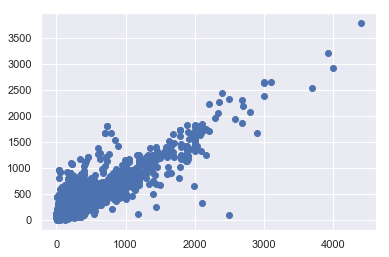

In [86]:
plt.scatter(Y_test,regressor_test_data)

Feature Importance using XGBoost

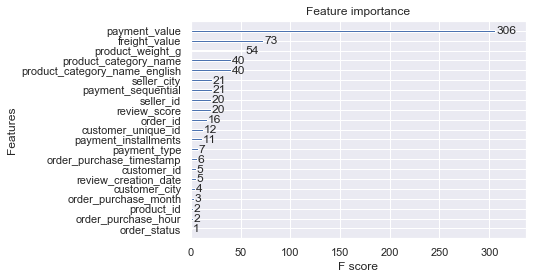

In [87]:
plot_importance(XGB)
plt.show()

so according to the above graph we have seen that the following features: payment_value, freight_value, product_weight_g, product_category_name, product_category_name_english are the most important that we can use when creating the final model 

##### LinearRegression

In [88]:
linear = LinearRegression()

In [89]:
# training the Model
linear.fit(X_train_scaled, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Model Evaluation

In [90]:
# predicting on training data
linear_train_data = linear.predict(X_train_scaled)
linear_accuracy = metrics.r2_score(Y_train, linear_train_data)
print(f'Model training Accuracy : {round(linear_accuracy*100,2)}%')

Model training Accuracy : 58.8%


In [91]:
# predicting on testing data
linear_test_data = linear.predict(X_test_scaled)
print('R-squared:', metrics.r2_score(Y_test, linear_test_data))
print('MAE:', metrics.mean_absolute_error(Y_test, linear_test_data))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, linear_test_data)))

R-squared: 0.6077859524255407
MAE: 52.244390831343665
RMSE: 111.42357137935687


* R-squared: 
shows how well the data fit the regression model
Generally, a higher r-squared indicates a better fit for the model

* MAE:
represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set

* RMSE:
interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. 
Lower values of RMSE indicate better fit.

In [92]:
# Model Accuracy Score
score = linear.score(X_test_scaled, Y_test)
print(f'Model Accuracy : {round(score*100,2)}%')

Model Accuracy : 60.78%


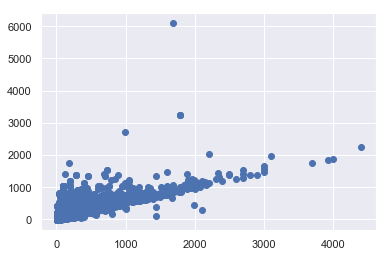

In [93]:
plt.scatter(Y_test,linear_test_data)

#### Creating the Final Model
Know that we have created two models and seen their accuracy score, we will use the model which has the highest Model Accuracy that is XGBRegressor to create our final model. Also now we know which features have more importance in our model we dont have to include all of them  

In [94]:
# Setting target and features
X_set = olistData[['product_category_name', 'product_category_name_english', 'product_weight_g', 'freight_value', 'payment_value']]

Y_set = olistData['price']

In [95]:
# Splitting the data into Train set & Test set
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, test_size=0.3, random_state=2)

In [96]:
print("Shape of Original features: ", X_set.shape) 
print("Shape of Training features: ", X_train.shape)
print("Shape of Testing features: ", X_test.shape)

Shape of Original features:  (111020, 5)
Shape of Training features:  (77714, 5)
Shape of Testing features:  (33306, 5)


Feature Scaling

In [97]:
# using MinMaxScaler to scale our features
scaler = MinMaxScaler()

# fitting the scaler with the train set so that it learn the parameters
scaler.fit(X_train)

# transforming train and test set
X_train_set = scaler.transform(X_train)
X_test_set = scaler.transform(X_test)

In [98]:
# the scaler stores the mean of the features learned from the X_train set in max_
scaler.data_max_

array([   70.  ,    70.  , 40425.  ,   409.68, 13664.08])

In [99]:
# the scaler stores the mean of the features learned from the X_train set in min_
scaler.data_min_

array([0.  , 0.  , 0.  , 0.  , 0.01])

In [100]:
# the scaler stores the standard deviation of the features learned from the X_train set in scale_
scaler.scale_

array([1.42857143e-02, 1.42857143e-02, 2.47371676e-05, 2.44092951e-03,
       7.31846368e-05])

In [101]:
# X_train in form of numpy array
X_train_set

array([[0.45714286, 0.92857143, 0.01978973, 0.03949424, 0.01114822],
       [0.77142857, 0.55714286, 0.01731602, 0.0309754 , 0.00428716],
       [1.        , 0.7       , 0.06431664, 0.0661736 , 0.01047199],
       ...,
       [0.97142857, 0.97142857, 0.00742115, 0.03717536, 0.00389415],
       [0.62857143, 0.21428571, 0.01236858, 0.02868092, 0.00465747],
       [0.18571429, 0.1       , 0.08410637, 0.04994142, 0.04214703]])

In [102]:
# transforming X_train_set and X_test_set from numpy array to dataframe
X_train_set = pd.DataFrame(X_train_set, columns=X_train.columns)
X_test_set = pd.DataFrame(X_test_set, columns=X_test.columns)

In [103]:
# rounded up to 2dp
# X_train_set.describe()
np.round(X_train_set.describe(),3)

,product_category_name,product_category_name_english,product_weight_g,freight_value,payment_value
count,77714.000,77714.000,77714.000,77714.000,77714.000
mean,0.521,0.558,0.052,0.049,0.013
std,0.308,0.322,0.093,0.039,0.020
min,0.000,0.000,0.000,0.000,0.000
25%,0.186,0.214,0.007,0.032,0.005
50%,0.457,0.600,0.017,0.040,0.008
75%,0.786,0.857,0.045,0.052,0.014
max,1.000,1.000,1.000,1.000,1.000


XGBoost Regressor

In [104]:
Model = XGBRegressor()

In [105]:
# training the Model
Model.fit(X_train_set, Y_train)

[12:19:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

Model Evaluation

In [106]:
# predicting on training data
Model_train = Model.predict(X_train_set)
accuracy = metrics.r2_score(Y_train, Model_train)
print(f'Model training Accuracy : {round(accuracy*100,2)}%')

Model training Accuracy : 81.86%


In [107]:
# predicting on testing data
Model_test = Model.predict(X_test_set)
print('R-squared:', metrics.r2_score(Y_test, Model_test))
print('MAE:', metrics.mean_absolute_error(Y_test, Model_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Model_test)))

R-squared: 0.7916750772930844
MAE: 39.31626865024001
RMSE: 81.20562569780209


* R-squared: 
shows how well the data fit the regression model
Generally, a higher r-squared indicates a better fit for the model

* MAE:
represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set

* RMSE:
interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. 
Lower values of RMSE indicate better fit.

In [108]:
# Model Accuracy Score
score = Model.score(X_test_set, Y_test)
print(f'Model Accuracy : {round(score*100,2)}%')

Model Accuracy : 79.17%


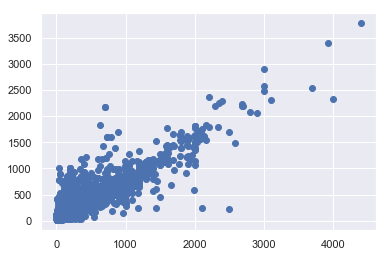

In [109]:
plt.scatter(Y_test, Model_test)

Displaying Feature Importance 

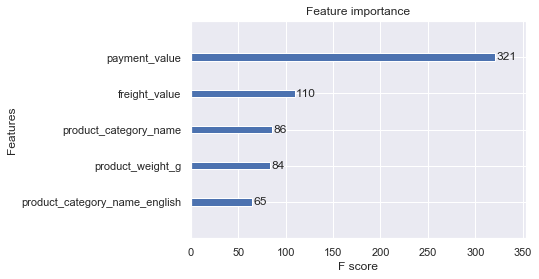

In [110]:
plot_importance(Model)
plt.show()

##### What are the significant predictors of your best model
Predictor variables also known as independent variables or x-variables and input variables. predictor variable with highest correlation is a good predictor. You can also compare coefficients to select the best predictor

In the above model the predictors which are significant are payement_value, freight_value, product_weight_g, product_category_name and product_category_name_english

##### How is a generalization for your best-performing model? 
Generalization is a model’s ability to react to new data after being trained on a training set, a model can digest new data and make accurate predictions. A model’s ability to generalize is central to the success of a model.

continue

##### Is your model overfitting or underfitting?
Using MinMaxScaler to scale the features of the dataset, i created a scale fitted it with the train set so that it learn the parameters to ensure that there wont be overfitting or underfitting the model.  